<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Notebook-setup" data-toc-modified-id="Notebook-setup-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Notebook setup</a></span></li><li><span><a href="#Functions" data-toc-modified-id="Functions-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Functions</a></span></li><li><span><a href="#Import-data" data-toc-modified-id="Import-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Import data</a></span><ul class="toc-item"><li><span><a href="#Inferred-s-and-mu-for-simulated-data" data-toc-modified-id="Inferred-s-and-mu-for-simulated-data-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Inferred s and mu for simulated data</a></span></li><li><span><a href="#Number-of-mCA-calls-for-each-simulation" data-toc-modified-id="Number-of-mCA-calls-for-each-simulation-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Number of mCA calls for each simulation</a></span></li></ul></li><li><span><a href="#Effect-of-upper-cell-fraction-limit-of-detection-on-fitness-inferences" data-toc-modified-id="Effect-of-upper-cell-fraction-limit-of-detection-on-fitness-inferences-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Effect of upper cell fraction limit of detection on fitness inferences</a></span></li><li><span><a href="#Effect-of-lower-cell-fraction-limit-of-detection-on-mutation-rate-inference" data-toc-modified-id="Effect-of-lower-cell-fraction-limit-of-detection-on-mutation-rate-inference-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Effect of lower cell fraction limit of detection on mutation rate inference</a></span></li></ul></div>

In [20]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

# Notebook setup

In [21]:
# imported packages
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd
import numpy as np
import ast
import functools
from functools import reduce
import scipy
import scipy.special

In [22]:
plt.style.use('cwpython.mplstyle') #use custom style file

In [23]:
#define the colors from colorbrewer2
orange1 = '#feedde'
orange2 = '#fdbe85'
orange3 = '#fd8d3c'
orange4 = '#e6550d'
orange5 = '#a63603'
blue1 = '#eff3ff'
blue2 = '#bdd7e7'
blue3 = '#6baed6'
blue4 = '#3182bd'
blue5 = '#08519c'
green1 = '#edf8e9'
green2 = '#bae4b3'
green3 = '#74c476'
green4 = '#31a354'
green5 = '#006d2c'
grey1 = '#f7f7f7'
grey2 = '#cccccc'
grey3 = '#969696'
grey4 = '#636363'
grey5 = '#252525'
purple1 = '#f2f0f7'
purple2 = '#cbc9e2'
purple3 = '#9e9ac8'
purple4 = '#756bb1'
purple5 = '#54278f'
red1 = '#fee5d9'
red2 = '#fcae91'
red3 = '#fb6a4a'
red4 = '#de2d26'
red5 = '#a50f15'

In [24]:
neutral_color='#fdbf6f'
gain_color = '#e31a1c'
loss_color = '#a6cee3'

In [25]:
#cell fraction limits of detection
gain_lower = 0.025
gain_upper = 0.999
loss_lower = 0.041
loss_upper = 0.67
CNLOH_lower = 0.015
CNLOH_upper = 0.54
no_limit = 0.999

# Functions

In [26]:
def convert_back_to_list(string_list): #convert a string of a list back to a list
    return ast.literal_eval(string_list) 

# Import data

## Inferred s and mu for simulated data

- s and mu inferred using MLE heatmap (using cumulative logit cell fractions), using mCA_mu_and_s_MLE_using_heatmaps_simulated_data.py

In [51]:
df = pd.read_csv('Data_files/Simulation_s_mu_inferences.txt', delimiter = '\t')
df['s probs list']= df['S probs list'].apply(convert_back_to_list)
df['mu probs list']= df['Mu probs list'].apply(convert_back_to_list)
df_results = pd.DataFrame.to_dict(df, orient = 'index')

## Number of mCA calls for each simulation

In [30]:
def logit_cell_fractions_CF(df, lower_limit, upper_limit):
    df_copy = df.copy(deep = True)
    CFs_mCA = df_copy['true_freq'].to_list()
    CFs = []
    for i in CFs_mCA:
        if lower_limit <= (i) <= upper_limit:
            CFs.append(scipy.special.logit(i)) #logit
    return CFs

In [31]:
def number_of_mCA_calls(fitness, lower_limit, integral_limit):
    df = pd.read_csv('Simulation_results/Simulated_mCAs/biobank_sim_test_u=4.35e-09_s_'+str(fitness)+'01_N100000_u_mCA=4.35e-09_seed3_biobank_variants.csv')
    logit_cell_fractions = logit_cell_fractions_CF(df, lower_limit, integral_limit)
    N = len(logit_cell_fractions)
    return N

In [32]:
fitnesses = ['0.06',
 '0.07',
 '0.08',
 '0.09',
 '0.10',
 '0.11',
 '0.12',
 '0.13',
 '0.14',
 '0.15',
 '0.16',
 '0.17',
 '0.18',
 '0.19',
 '0.20',
 '0.21',
 '0.22',
 '0.23',
 '0.24',
 '0.25',
 '0.26',
 '0.27',
 '0.28',
 '0.29',
 '0.30',
 '0.31',
 '0.32',
 '0.33',
 '0.34',
 '0.35']

In [33]:
#create a table of the number of mCA calls in each simulation (with and without cell fraction trimming)
mCA_calls_gains = {}
mCA_calls_losses = {}
mCA_calls_losses_trimmed = {}
mCA_calls_CNLOH = {}
mCA_calls_CNLOH_trimmed = {}

for fitness in fitnesses:
    mCA_calls_gains[fitness]= number_of_mCA_calls(fitness, gain_lower, gain_upper)
    mCA_calls_losses[fitness]= number_of_mCA_calls(fitness, loss_lower, no_limit)
    mCA_calls_losses_trimmed[fitness]= number_of_mCA_calls(fitness, loss_lower, loss_upper)
    mCA_calls_CNLOH[fitness]= number_of_mCA_calls(fitness, CNLOH_lower, no_limit)
    mCA_calls_CNLOH_trimmed[fitness]= number_of_mCA_calls(fitness, CNLOH_lower, CNLOH_upper)
    
df_gains = pd.DataFrame.from_dict(mCA_calls_gains, orient = 'index', columns = ['gains'])
df_losses = pd.DataFrame.from_dict(mCA_calls_losses, orient = 'index', columns = ['losses'])
df_losses_trimmed = pd.DataFrame.from_dict(mCA_calls_losses_trimmed, orient = 'index', columns = ['losses_trimmed'])
df_CNLOH = pd.DataFrame.from_dict(mCA_calls_CNLOH, orient = 'index', columns = ['CN-LOH'])
df_CNLOH_trimmed = pd.DataFrame.from_dict(mCA_calls_CNLOH_trimmed, orient = 'index', columns = ['CN-LOH_trimmed'])

df_all_calls = reduce(lambda left, right: pd.merge(left, right, left_index = True, right_index = True), [df_gains, df_losses, df_losses_trimmed, df_CNLOH, df_CNLOH_trimmed])
df_all_calls_transposed = df_all_calls.T
df_all_calls_transposed

,0.06,0.07,0.08,0.09,0.10,0.11,0.12,0.13,0.14,0.15,...,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35
gains,2,11,17,30,79,154,212,286,339,429,...,1468,1505,1654,1674,1717,1714,1780,1851,1744,1752
losses,1,1,6,11,44,91,150,196,270,330,...,1371,1400,1547,1562,1633,1630,1681,1746,1645,1666
losses_trimmed,1,1,6,11,44,91,150,194,267,324,...,740,733,767,741,732,718,722,738,685,671
CN-LOH,7,28,41,74,136,216,284,374,429,542,...,1575,1614,1747,1766,1809,1816,1872,1956,1838,1845
CN-LOH_trimmed,7,28,41,74,136,216,284,371,420,528,...,847,859,867,840,795,796,807,832,780,758


# Effect of upper cell fraction limit of detection on fitness inferences

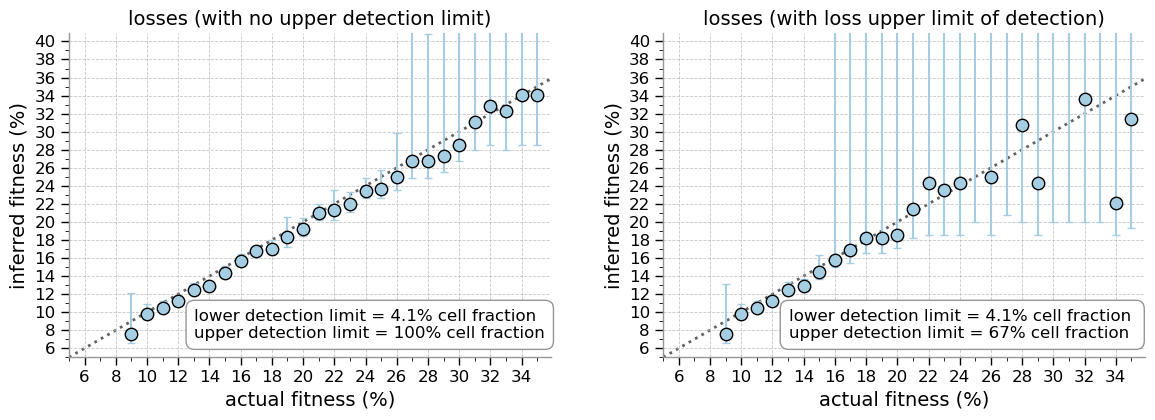

In [57]:
#losses (lower cell fraction limit of detection = 4.1%, upper cell fraction limit of detection = 67%)
fig, axes = plt.subplots(1, 2, figsize = (12, 4.3))

ax1 = axes[0]
ax2 = axes[1]

#No upper cell fraction detection limit
for k, v in df_results.items():
    if v['mCA type']=='-':
        if v['Upper limit detection'] == no_limit:
            if v['Number of mCAs']>=8:
                ax1.scatter(v['Actual fitness']*100, v['Inferred s']*100, s = 80, lw = 1, edgecolor = 'k', color = loss_color, zorder = 50)
                upper_err = (v['Inferred s upper 95 CI']*100)-(v['Inferred s']*100)
                lower_err = (v['Inferred s']*100)-(v['Inferred s lower 95 CI']*100)
                err = [[lower_err], [upper_err]]
                ax1.errorbar(v['Actual fitness']*100, v['Inferred s']*100, yerr = err, fmt = '', color = loss_color, zorder = 10)
            
ax1.plot([5, 40], [5, 40], color = grey4, zorder = 0, lw = 2, linestyle = ':')

ax1.set_title('losses (with no upper detection limit)')
ax1.set_xlabel('actual fitness (%)')
ax1.set_ylabel('inferred fitness (%)')
ax1.xaxis.set_major_locator(ticker.MultipleLocator(2))
ax1.xaxis.set_minor_locator(ticker.MultipleLocator(1))
ax1.yaxis.set_major_locator(ticker.MultipleLocator(2))
ax1.yaxis.set_minor_locator(ticker.MultipleLocator(1))
ax1.set_ylim(5, 40.9)
ax1.set_xlim(5, 35.9)

ax1.text(0.26, 0.05, 'lower detection limit = 4.1% cell fraction \nupper detection limit = 100% cell fraction', color='black', 
        bbox=dict(facecolor='white', edgecolor=grey3, boxstyle='round,pad=0.5'), fontsize = 12,
         transform=ax1.transAxes, ha = 'left', va = 'bottom')


#Upper cell fraction detection limit
for k, v in df_results.items():
    if v['mCA type']=='-':
        if v['Upper limit detection'] == loss_upper:
            if v['Number of mCAs']>=8:
                ax2.scatter(v['Actual fitness']*100, v['Inferred s']*100, s = 80, lw = 1, edgecolor = 'k', color = loss_color, zorder = 50)
                upper_err = (v['Inferred s upper 95 CI']*100)-(v['Inferred s']*100)
                lower_err = (v['Inferred s']*100)-(v['Inferred s lower 95 CI']*100)
                err = [[lower_err], [upper_err]]
                ax2.errorbar(v['Actual fitness']*100, v['Inferred s']*100, yerr = err, fmt = '', color = loss_color, zorder = 10)
    
ax2.plot([5, 40], [5, 40], color = grey4, zorder = 0, lw = 2, linestyle = ':')

ax2.set_title('losses (with loss upper limit of detection)')
ax2.set_xlabel('actual fitness (%)')
ax2.set_ylabel('inferred fitness (%)')
ax2.xaxis.set_major_locator(ticker.MultipleLocator(2))
ax2.xaxis.set_minor_locator(ticker.MultipleLocator(1))
ax2.yaxis.set_major_locator(ticker.MultipleLocator(2))
ax2.yaxis.set_minor_locator(ticker.MultipleLocator(1))
ax2.set_ylim(5, 40.9)
ax2.set_xlim(5, 35.9)

ax1.grid(zorder = 0)
ax2.grid(zorder = 0)

ax2.text(0.26, 0.05, 'lower detection limit = 4.1% cell fraction \nupper detection limit = 67% cell fraction', color='black', 
        bbox=dict(facecolor='white', edgecolor=grey3, boxstyle='round,pad=0.5'), fontsize = 12,
         transform=ax2.transAxes, ha = 'left', va = 'bottom')
    
plt.tight_layout()
plt.savefig('Figures/Fitness_inference_losses.pdf')
plt.show()

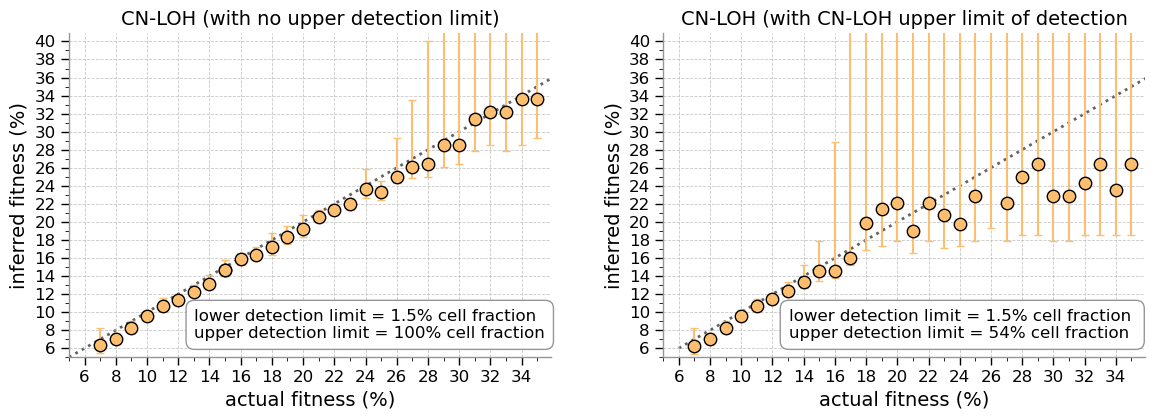

In [58]:
#CNLOH (lower cell fraction limit of detection = 1.5%, upper cell fraction limit of detection = 54%)
fig, axes = plt.subplots(1, 2, figsize = (12, 4.3))

ax1 = axes[0]
ax2 = axes[1]

#No upper cell fraction detection limit
for k, v in df_results.items():
    if v['mCA type']=='=':
        if v['Upper limit detection'] == no_limit:
            if v['Number of mCAs']>=8:
                ax1.scatter(v['Actual fitness']*100, v['Inferred s']*100, s = 80, lw = 1, edgecolor = 'k', color = neutral_color, zorder = 50)
                upper_err = (v['Inferred s upper 95 CI']*100)-(v['Inferred s']*100)
                lower_err = (v['Inferred s']*100)-(v['Inferred s lower 95 CI']*100)
                err = [[lower_err], [upper_err]]
                ax1.errorbar(v['Actual fitness']*100, v['Inferred s']*100, yerr = err, fmt = '', color = neutral_color, zorder = 10)
            
ax1.plot([5, 40], [5, 40], color = grey4, zorder = 0, lw = 2, linestyle = ':')

ax1.set_title('CN-LOH (with no upper detection limit)')
ax1.set_xlabel('actual fitness (%)')
ax1.set_ylabel('inferred fitness (%)')
ax1.xaxis.set_major_locator(ticker.MultipleLocator(2))
ax1.xaxis.set_minor_locator(ticker.MultipleLocator(1))
ax1.yaxis.set_major_locator(ticker.MultipleLocator(2))
ax1.yaxis.set_minor_locator(ticker.MultipleLocator(1))
ax1.set_ylim(5, 40.9)
ax1.set_xlim(5, 35.9)

ax1.text(0.26, 0.05, 'lower detection limit = 1.5% cell fraction \nupper detection limit = 100% cell fraction', color='black', 
        bbox=dict(facecolor='white', edgecolor=grey3, boxstyle='round,pad=0.5'), fontsize = 12,
         transform=ax1.transAxes, ha = 'left', va = 'bottom')

#Upper cell fraction detection limit
for k, v in df_results.items():
    if v['mCA type']=='=':
        if v['Upper limit detection'] == CNLOH_upper:
            if v['Number of mCAs']>=8:
                ax2.scatter(v['Actual fitness']*100, v['Inferred s']*100, s = 80, lw = 1, edgecolor = 'k', color = neutral_color, zorder = 50)
                upper_err = (v['Inferred s upper 95 CI']*100)-(v['Inferred s']*100)
                lower_err = (v['Inferred s']*100)-(v['Inferred s lower 95 CI']*100)
                err = [[lower_err], [upper_err]]
                ax2.errorbar(v['Actual fitness']*100, v['Inferred s']*100, yerr = err, fmt = '', color = neutral_color, zorder = 10)
    
ax2.plot([6, 40], [6, 40], color = grey4, zorder = 0, lw = 2, linestyle = ':')

ax2.set_title('CN-LOH (with CN-LOH upper limit of detection')
ax2.set_xlabel('actual fitness (%)')
ax2.set_ylabel('inferred fitness (%)')
ax2.xaxis.set_major_locator(ticker.MultipleLocator(2))
ax2.xaxis.set_minor_locator(ticker.MultipleLocator(1))
ax2.yaxis.set_major_locator(ticker.MultipleLocator(2))
ax2.yaxis.set_minor_locator(ticker.MultipleLocator(1))
ax2.set_ylim(5, 40.9)
ax2.set_xlim(5, 35.9)

ax2.text(0.26, 0.05, 'lower detection limit = 1.5% cell fraction \nupper detection limit = 54% cell fraction', color='black', 
        bbox=dict(facecolor='white', edgecolor=grey3, boxstyle='round,pad=0.5'), fontsize = 12,
         transform=ax2.transAxes, ha = 'left', va = 'bottom')

ax1.grid(zorder = 0)
ax2.grid(zorder = 0)
    
plt.tight_layout()
plt.savefig('Figures/Fitness_inference_CNLOH.pdf')
plt.show()

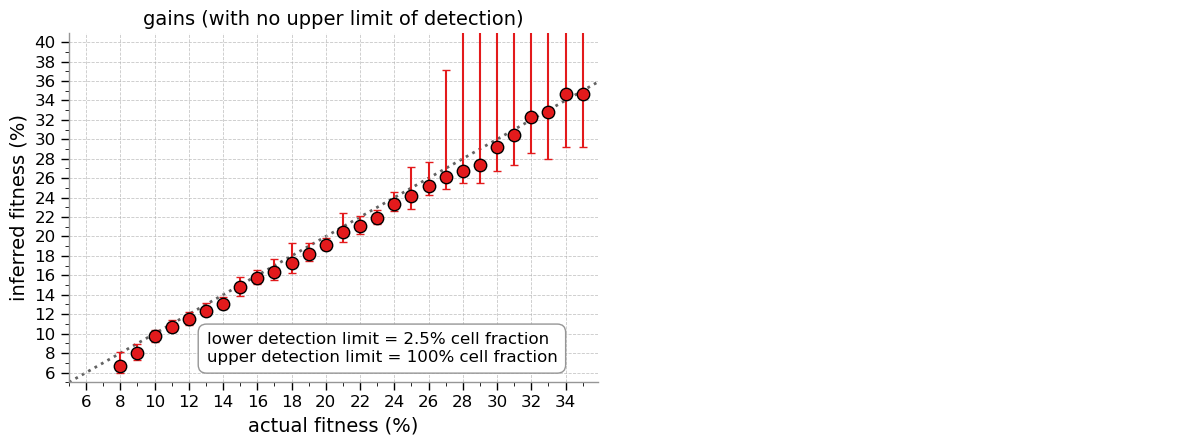

In [62]:
#gains (lower cell fraction limit of detection = 2.5%, upper cell fraction limit of detection = 99.9%)
fig, axes = plt.subplots(1, 2, figsize = (12, 4.55))

ax1 = axes[0]
ax2 = axes[1]

#No upper cell fraction detection limit
for k, v in df_results.items():
    if v['mCA type']=='+':
        if v['Upper limit detection'] == no_limit:
            if v['Number of mCAs']>=8:
                ax1.scatter(v['Actual fitness']*100, v['Inferred s']*100, s = 80, lw = 1, edgecolor = 'k', color = gain_color, zorder = 50)
                upper_err = (v['Inferred s upper 95 CI']*100)-(v['Inferred s']*100)
                lower_err = (v['Inferred s']*100)-(v['Inferred s lower 95 CI']*100)
                err = [[lower_err], [upper_err]]
                ax1.errorbar(v['Actual fitness']*100, v['Inferred s']*100, yerr = err, fmt = '', color = gain_color, zorder = 10)
    
ax1.plot([5, 40], [5, 40], color = grey4, zorder = 0, lw = 2, linestyle = ':')

ax1.set_title('gains (with no upper limit of detection)')
ax1.set_xlabel('actual fitness (%)')
ax1.set_ylabel('inferred fitness (%)')
ax1.xaxis.set_major_locator(ticker.MultipleLocator(2))
ax1.xaxis.set_minor_locator(ticker.MultipleLocator(1))
ax1.yaxis.set_major_locator(ticker.MultipleLocator(2))
ax1.yaxis.set_minor_locator(ticker.MultipleLocator(1))
ax1.set_ylim(5, 40.9)
ax1.set_xlim(5, 35.9)

ax1.grid(zorder = 0)

ax1.text(0.26, 0.05, 'lower detection limit = 2.5% cell fraction \nupper detection limit = 100% cell fraction', color='black', 
        bbox=dict(facecolor='white', edgecolor=grey3, boxstyle='round,pad=0.5'), fontsize = 12,
         transform=ax1.transAxes, ha = 'left', va = 'bottom')

ax2.set_axis_off()
    
plt.tight_layout()
plt.savefig('Figures/Fitness_inference_gains.pdf')
plt.show()

# Effect of lower cell fraction limit of detection on mutation rate inference

In [16]:
actual_mu = 4.35e-9 #mutation rate used in simulation

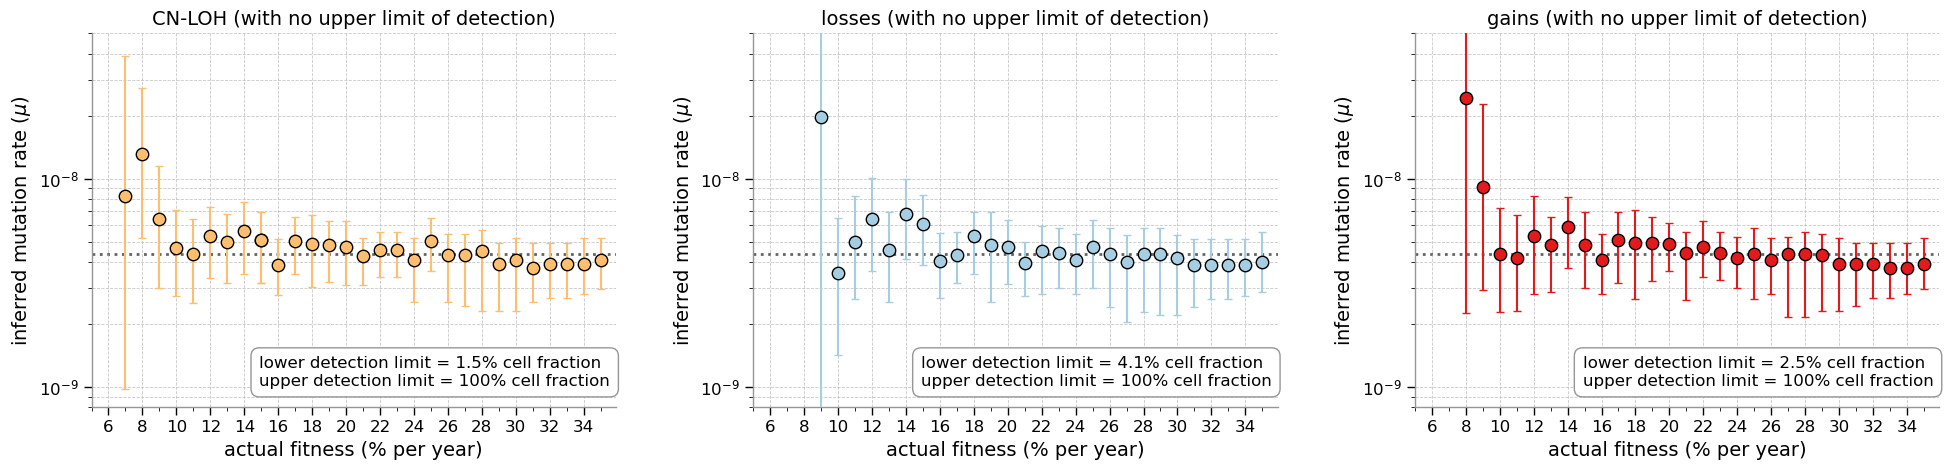

In [52]:
#with no upper cell fraction trimming
fig, axes = plt.subplots(1, 3, figsize = (20, 4.8))

ax1 = axes[0]
ax2 = axes[1]
ax3 = axes[2]

#CNLOH
for k, v in df_results.items():
    if v['mCA type']=='=':
        if v['Upper limit detection'] == no_limit:
            if v['Number of mCAs']>=8:
                ax1.scatter(v['Actual fitness']*100, v['Inferred mu'], s = 80, lw = 1, edgecolor = 'k', color = neutral_color, zorder = 50)
                upper_err = (v['Inferred mu upper 95 CI'])-(v['Inferred mu'])
                lower_err = (v['Inferred mu'])-(v['Inferred mu lower 95 CI'])
                err = [[lower_err], [upper_err]]
                ax1.errorbar(v['Actual fitness']*100, v['Inferred mu'], yerr = err, lw = 1.5, fmt = '', color = neutral_color, zorder = 10)

#losses
for k, v in df_results.items():
    if v['mCA type']=='-':
        if v['Upper limit detection'] == no_limit:
            if v['Number of mCAs']>=8:
                ax2.scatter(v['Actual fitness']*100, v['Inferred mu'], s = 80, lw = 1, edgecolor = 'k', color = loss_color, zorder = 50)
                upper_err = (v['Inferred mu upper 95 CI'])-(v['Inferred mu'])
                lower_err = (v['Inferred mu'])-(v['Inferred mu lower 95 CI'])
                err = [[lower_err], [upper_err]]
                ax2.errorbar(v['Actual fitness']*100, v['Inferred mu'], yerr = err, lw = 1.5, fmt = '', color = loss_color, zorder = 10)

#Gains
for k, v in df_results.items():
    if v['mCA type']=='+':
        if v['Upper limit detection'] == no_limit:
            if v['Number of mCAs']>=8:
                ax3.scatter(v['Actual fitness']*100, v['Inferred mu'], s = 80, lw = 1, edgecolor = 'k', color = gain_color, zorder = 50)
                upper_err = (v['Inferred mu upper 95 CI'])-(v['Inferred mu'])
                lower_err = (v['Inferred mu'])-(v['Inferred mu lower 95 CI'])
                err = [[lower_err], [upper_err]]
                ax3.errorbar(v['Actual fitness']*100, v['Inferred mu'], yerr = err, lw = 1.5, fmt = '', color = gain_color, zorder = 10)

for ax in axes.flatten():
    ax.plot([5, 35.9], [4.35e-9, 4.35e-9], color = grey4, zorder = 0, lw = 2, linestyle = ':')
    ax.set_xlim(5, 35.9)
    ax.set_ylim(8e-10, 5e-8)
    ax.set_yscale('log')
    ax.xaxis.set_major_locator(ticker.MultipleLocator(2))
    ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))
    ax.grid(which = 'both', axis = 'y', zorder = 0)
    ax.grid(which = 'major', axis = 'x', zorder = 0)
    ax.set_xlabel('actual fitness (% per year)')
    ax.set_ylabel('inferred mutation rate ($\u03BC$)')

ax1.set_title('CN-LOH (with no upper limit of detection)')
ax2.set_title('losses (with no upper limit of detection)')
ax3.set_title('gains (with no upper limit of detection)')
    
ax1.text(0.32, 0.05, 'lower detection limit = 1.5% cell fraction \nupper detection limit = 100% cell fraction', color='black', 
        bbox=dict(facecolor='white', edgecolor=grey3, boxstyle='round,pad=0.5'), fontsize = 12,
         transform=ax1.transAxes, ha = 'left', va = 'bottom')

ax2.text(0.32, 0.05, 'lower detection limit = 4.1% cell fraction \nupper detection limit = 100% cell fraction', color='black', 
        bbox=dict(facecolor='white', edgecolor=grey3, boxstyle='round,pad=0.5'), fontsize = 12,
         transform=ax2.transAxes, ha = 'left', va = 'bottom')
    
ax3.text(0.32, 0.05, 'lower detection limit = 2.5% cell fraction \nupper detection limit = 100% cell fraction', color='black', 
        bbox=dict(facecolor='white', edgecolor=grey3, boxstyle='round,pad=0.5'), fontsize = 12,
         transform=ax3.transAxes, ha = 'left', va = 'bottom')
    
plt.tight_layout()
plt.savefig('Figures/Mutation_rate_inference_no_upper_limit.pdf')
plt.show()

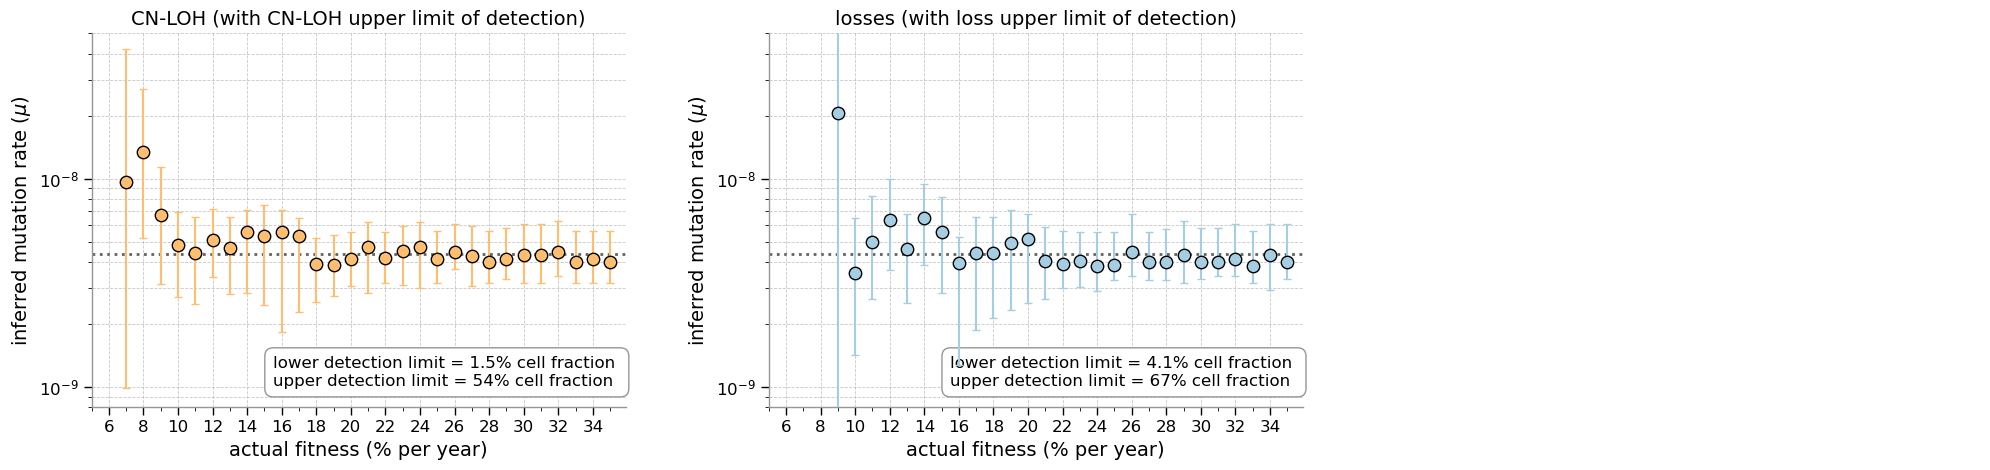

In [53]:
#with upper cell fraction trimming
fig, axes = plt.subplots(1, 3, figsize = (20, 4.8))

ax1 = axes[0]
ax2 = axes[1]
ax3 = axes[2]

#CNLOH
for k, v in df_results.items():
    if v['mCA type']=='=':
        if v['Upper limit detection'] == CNLOH_upper:
            if v['Number of mCAs']>=8:
                ax1.scatter(v['Actual fitness']*100, v['Inferred mu'], s = 80, lw = 1, edgecolor = 'k', color = neutral_color, zorder = 50)
                upper_err = (v['Inferred mu upper 95 CI'])-(v['Inferred mu'])
                lower_err = (v['Inferred mu'])-(v['Inferred mu lower 95 CI'])
                err = [[lower_err], [upper_err]]
                ax1.errorbar(v['Actual fitness']*100, v['Inferred mu'], yerr = err, lw = 1.5, fmt = '', color = neutral_color, zorder = 10)
                
#losses
for k, v in df_results.items():
    if v['mCA type']=='-':
        if v['Upper limit detection'] == loss_upper:
            if v['Number of mCAs']>=8:
                ax2.scatter(v['Actual fitness']*100, v['Inferred mu'], s = 80, lw = 1, edgecolor = 'k', color = loss_color, zorder = 50)
                upper_err = (v['Inferred mu upper 95 CI'])-(v['Inferred mu'])
                lower_err = (v['Inferred mu'])-(v['Inferred mu lower 95 CI'])
                err = [[lower_err], [upper_err]]
                ax2.errorbar(v['Actual fitness']*100, v['Inferred mu'], yerr = err, lw = 1.5, fmt = '', color = loss_color, zorder = 10)


for ax in [ax1, ax2]:
    ax.plot([5, 35.9], [4.35e-9, 4.35e-9], color = grey4, zorder = 0, lw = 2, linestyle = ':')
    ax.set_xlim(5, 35.9)
    ax.set_ylim(8e-10, 5e-8)
    ax.set_yscale('log')
    ax.xaxis.set_major_locator(ticker.MultipleLocator(2))
    ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))
    ax.grid(which = 'both', axis = 'y', zorder = 0)
    ax.grid(which = 'major', axis = 'x', zorder = 0)
    ax.set_xlabel('actual fitness (% per year)')
    ax.set_ylabel('inferred mutation rate ($\u03BC$)')

ax1.set_title('CN-LOH (with CN-LOH upper limit of detection)')
ax2.set_title('losses (with loss upper limit of detection)')
    
ax1.text(0.34, 0.05, 'lower detection limit = 1.5% cell fraction \nupper detection limit = 54% cell fraction', color='black', 
        bbox=dict(facecolor='white', edgecolor=grey3, boxstyle='round,pad=0.5'), fontsize = 12,
         transform=ax1.transAxes, ha = 'left', va = 'bottom')

ax2.text(0.34, 0.05, 'lower detection limit = 4.1% cell fraction \nupper detection limit = 67% cell fraction', color='black', 
        bbox=dict(facecolor='white', edgecolor=grey3, boxstyle='round,pad=0.5'), fontsize = 12,
         transform=ax2.transAxes, ha = 'left', va = 'bottom')

ax3.set_axis_off()

plt.tight_layout()
plt.savefig('Figures/Mutation_rate_inference_with_upper_limit.pdf')
plt.show()